## **PneumoLiteCovNet-25 Architecture**

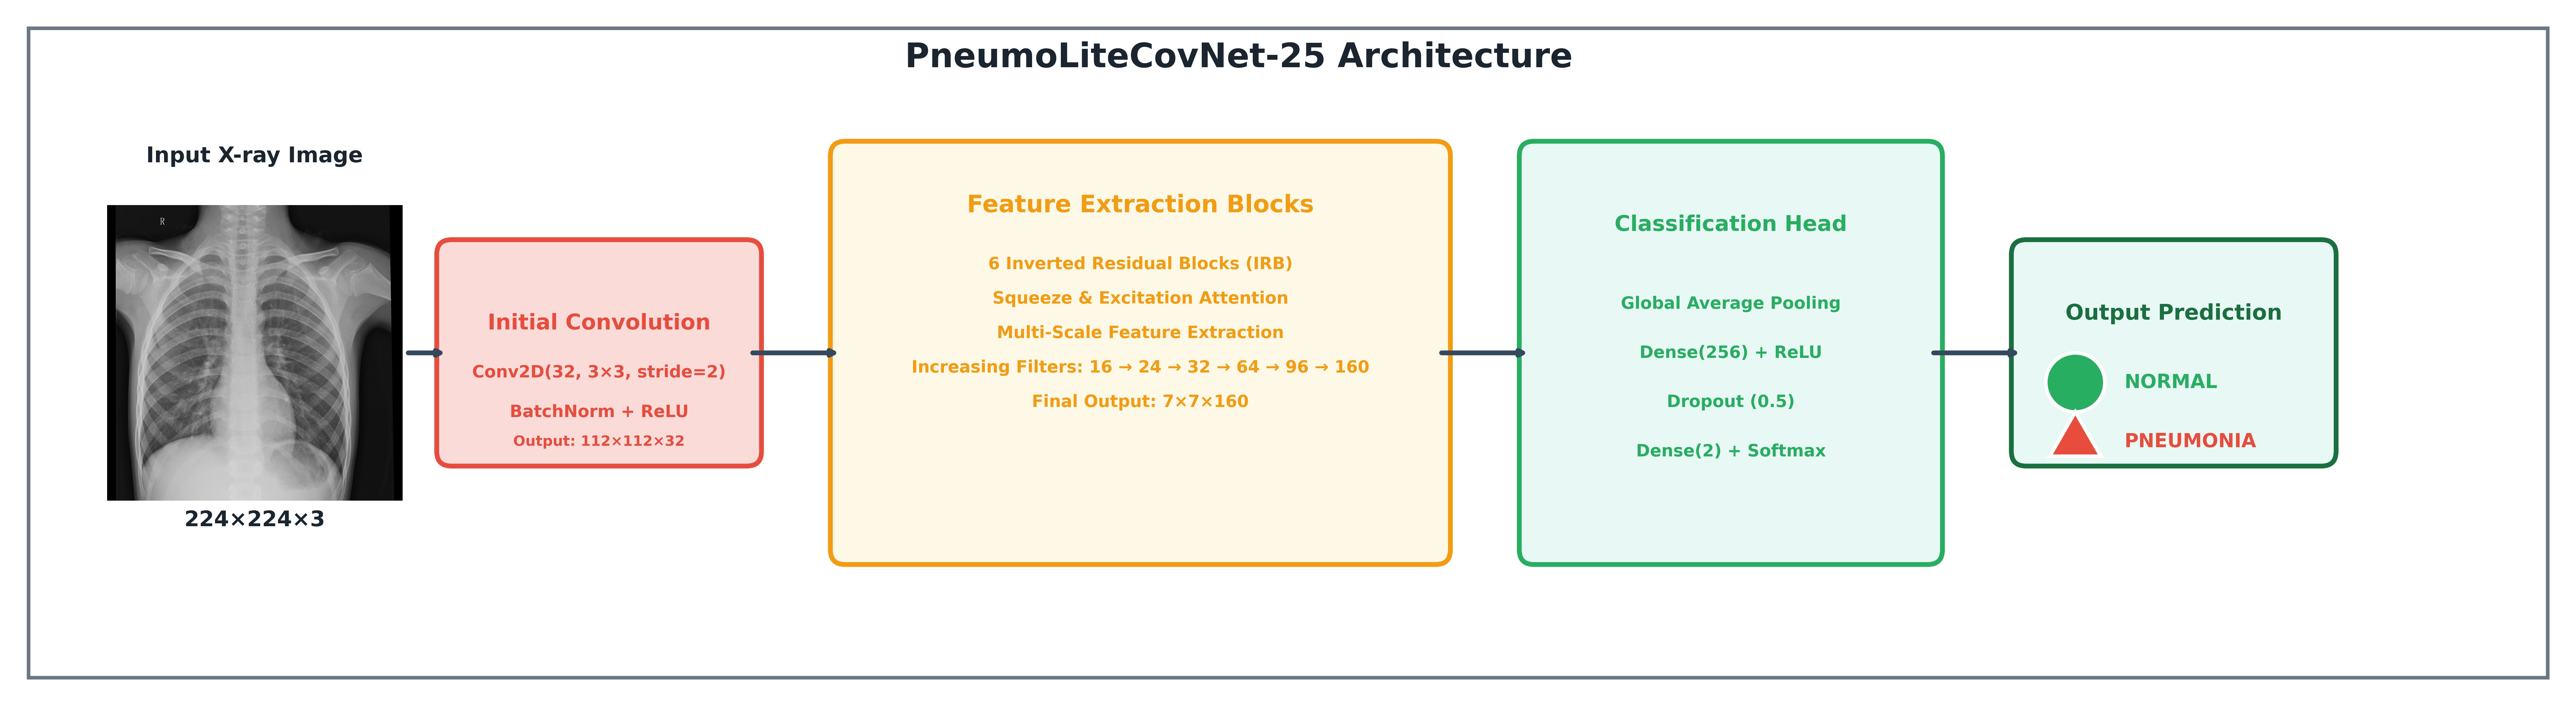

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np

# Load the specified X-ray image
img_path = "/content/drive/MyDrive/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg"
img = mpimg.imread(img_path)

# Create the figure with high DPI for better quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
fig, ax = plt.subplots(figsize=(30, 12))
ax.axis('off')

# Enhanced color scheme
colors = {
    'input': '#1A252F',
    'preprocess': '#2980B9',
    'convolution': '#E74C3C',
    'features': '#F39C12',
    'classification': '#27AE60',
    'output': '#196F3D',
    'normal': '#27AE60',
    'pneumonia': '#E74C3C'
}

# Title
ax.text(12.5, 10.5, "PneumoLiteCovNet-25 Architecture", ha='center', va='center',
        fontsize=28, fontweight='bold', color='#1A252F')


# -- Input X-ray Image --
ax.imshow(img, extent=[1, 4, 6, 9], zorder=2, cmap='gray')
ax.text(2.5, 9.5, "Input X-ray Image", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['input'])
ax.text(2.5, 5.8, "224×224×3", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['input'])

# -- Initial Convolution Block (shifted left) --
initial_conv_box = patches.FancyBboxPatch((4.5, 6.5), 3, 2, boxstyle="round,pad=0.15",
                                         edgecolor=colors['convolution'], facecolor='#FADBD8', lw=4)
ax.add_patch(initial_conv_box)
ax.text(6, 7.8, "Initial Convolution", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['convolution'])
ax.text(6, 7.3, "Conv2D(32, 3×3, stride=2)", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['convolution'])
ax.text(6, 6.9, "BatchNorm + ReLU", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['convolution'])
ax.text(6, 6.6, "Output: 112×112×32", ha='center', va='center', fontsize=12, fontweight='bold', color=colors['convolution'])

# -- Expanded Feature Extraction Blocks (shifted left) --
features_box = patches.FancyBboxPatch((8.5, 5.5), 6, 4, boxstyle="round,pad=0.15",  # Wider and slightly shorter
                                     edgecolor=colors['features'], facecolor='#FEF9E7', lw=4)
ax.add_patch(features_box)
ax.text(11.5, 9.0, "Feature Extraction Blocks", ha='center', va='center', fontsize=20, fontweight='bold', color=colors['features'])

feature_blocks = [
    "6 Inverted Residual Blocks (IRB)",
    "Squeeze & Excitation Attention",
    "Multi-Scale Feature Extraction",
    "Increasing Filters: 16 → 24 → 32 → 64 → 96 → 160",
    "Final Output: 7×7×160"
]

# Position text with more horizontal space
for i, block in enumerate(feature_blocks):
    ax.text(11.5, 8.4 - i*0.35, block, ha='center', va='center', fontsize=14, fontweight='bold', color=colors['features'])

# -- Taller Classification Head (shifted left) --
class_box = patches.FancyBboxPatch((15.5, 5.5), 4, 4, boxstyle="round,pad=0.15",  # Increased height
                                  edgecolor=colors['classification'], facecolor='#E8F8F5', lw=4)
ax.add_patch(class_box)
ax.text(17.5, 8.8, "Classification Head", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['classification'])
class_details = [
    "Global Average Pooling",
    "Dense(256) + ReLU",
    "Dropout (0.5)",
    "Dense(2) + Softmax"
]
# Position text with more vertical space
for i, detail in enumerate(class_details):
    ax.text(17.5, 8.0 - i*0.5, detail, ha='center', va='center', fontsize=14, fontweight='bold', color=colors['classification'])

# -- Final Output (shifted left) --
output_box = patches.FancyBboxPatch((20.5, 6.5), 3, 2, boxstyle="round,pad=0.15",
                                   edgecolor=colors['output'], facecolor='#E8F8F5', lw=4)
ax.add_patch(output_box)
ax.text(22, 7.9, "Output Prediction", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['output'])

# Adjusted symbol positions
normal_y = 7.2
normal_circle = patches.Circle((21, normal_y), 0.3, facecolor=colors['normal'], edgecolor='white', lw=3)
ax.add_patch(normal_circle)
ax.text(21.5, normal_y, "NORMAL", va='center', ha='left', fontsize=16, fontweight='bold', color=colors['normal'])

pneumonia_y = 6.6
pneumonia_triangle = patches.RegularPolygon((21, pneumonia_y), 3, radius=0.3,
                                           facecolor=colors['pneumonia'], edgecolor='white', lw=3)
ax.add_patch(pneumonia_triangle)
ax.text(21.5, pneumonia_y, "PNEUMONIA", va='center', ha='left', fontsize=16, fontweight='bold', color=colors['pneumonia'])

# -- Flow Arrows (adjusted for new positions) --
arrow_style = dict(arrowstyle='->', lw=4, color='#34495E', shrinkA=5, shrinkB=5)

# Main flow arrows
ax.annotate('', xy=(4.5, 7.5), xytext=(4, 7.5), arrowprops=arrow_style)  # Input to Conv
ax.annotate('', xy=(8.5, 7.5), xytext=(7.5, 7.5), arrowprops=arrow_style)  # Conv to Features
ax.annotate('', xy=(15.5, 7.5), xytext=(14.5, 7.5), arrowprops=arrow_style)  # Features to Classification
ax.annotate('', xy=(20.5, 7.5), xytext=(19.5, 7.5), arrowprops=arrow_style)  # Classification to Output

# Set axis limits (adjusted for shifted elements)
ax.set_xlim(0, 26)
ax.set_ylim(4, 11)

# Add border (adjusted for new dimensions)
border = patches.Rectangle((0.2, 4.2), 25.6, 6.6, linewidth=3, edgecolor='#2C3E50',
                          facecolor='none', linestyle='-', alpha=0.7)
ax.add_patch(border)

plt.tight_layout()

# Save with high quality
plt.savefig('pneumolightcovnet25_final.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

## **SE-EfficientNetB3 Pneumonia Diagnosis Architecture**

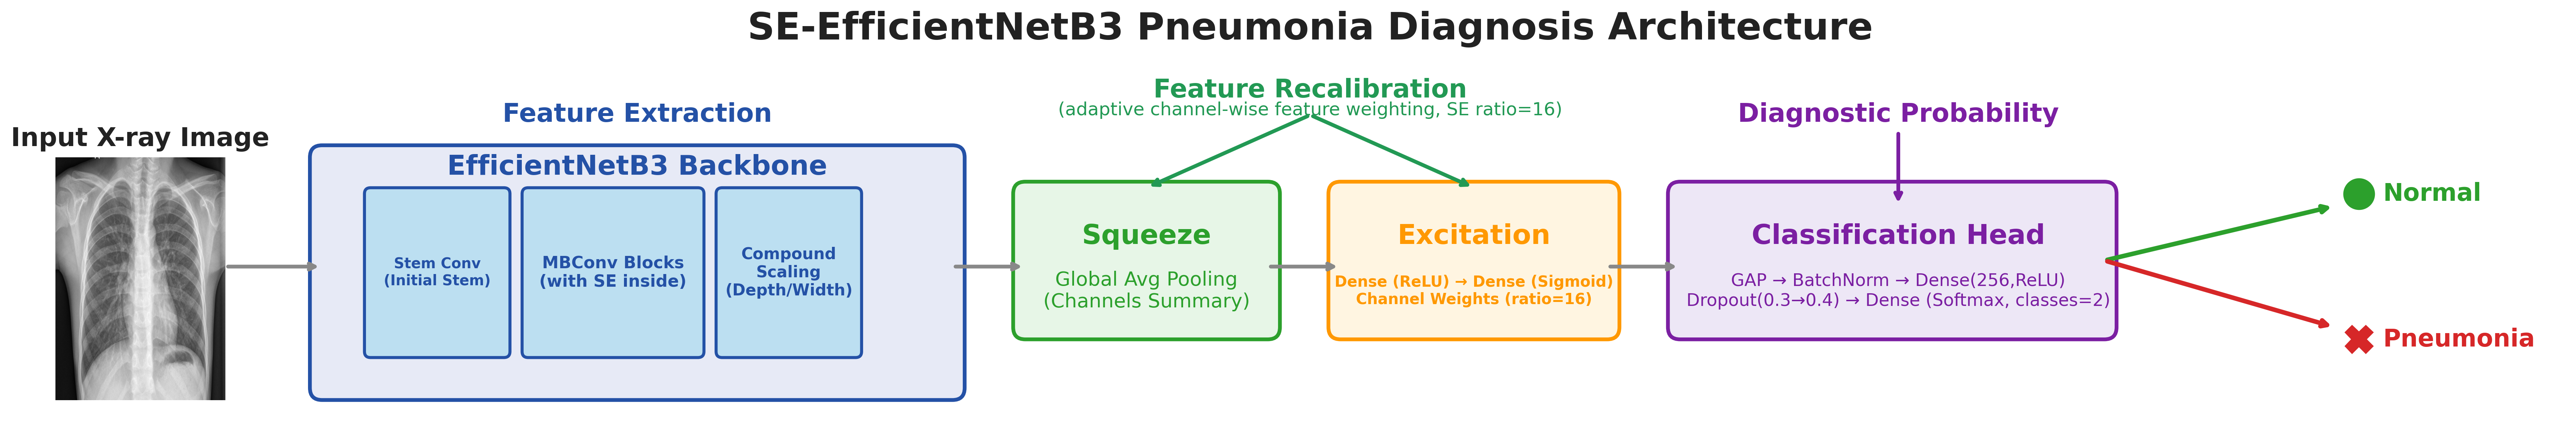

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np
import os

# Use the provided X-ray image path
img_path = "/content/drive/MyDrive/chest_xray/test/NORMAL/NORMAL-1110860-0001.jpeg"
img = mpimg.imread(img_path)

fig, ax = plt.subplots(figsize=(24, 6))
ax.axis('off')

# -- Section Headings --
ax.text(2.6, 3.35, "Feature Extraction", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#2451a6')
ax.text(8.15, 3.55, "Feature Recalibration", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#229954')
ax.text(8.15, 3.42, "(adaptive channel-wise feature weighting, SE ratio=16)", ha='center', va='bottom', fontsize=12, color='#229954')
ax.text(13.0, 3.35, "Diagnostic Probability", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#7b1fa2')

# -- Two-pointed arrow from Feature Recalibration to Squeeze and Excitation blocks --
ax.annotate('', xy=(6.8, 2.85), xytext=(8.15, 3.45),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#229954'))
ax.annotate('', xy=(9.5, 2.85), xytext=(8.15, 3.45),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#229954'))

# -- Single arrow from "Diagnostic Probability Head" to Classification Head block --
ax.annotate('', xy=(13.0, 2.7), xytext=(13.0, 3.32),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#7b1fa2'))

# -- Show Input X-ray Image --
ax.imshow(img, extent=[-2.2, -0.8, 1.1, 3.1], zorder=2, cmap='gray')
ax.text(-1.5, 3.15, "Input X-ray Image", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#222')

# -- EfficientNetB3 Block (bigger, with bigger sub-blocks) --
eff_box = patches.FancyBboxPatch((0, 1.2), 5.2, 1.9, boxstyle="round,pad=0.1", edgecolor='#2451a6', facecolor='#e7eaf6', lw=2.5, zorder=2)
ax.add_patch(eff_box)
ax.text(2.6, 3.02, "EfficientNetB3 Backbone", ha='center', va='center', fontsize=18, fontweight='bold', color='#2451a6')

# Sub-blocks inside EfficientNetB3 (bigger, spaced)
ax.add_patch(patches.FancyBboxPatch((0.4, 1.5), 1.1, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(0.95, 2.15, "Stem Conv\n(Initial Stem)", ha='center', va='center', fontsize=9.5, color='#2451a6', fontweight='bold')

ax.add_patch(patches.FancyBboxPatch((1.7, 1.5), 1.4, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(2.4, 2.15, "MBConv Blocks\n(with SE inside)", ha='center', va='center', fontsize=11, color='#2451a6', fontweight='bold')

ax.add_patch(patches.FancyBboxPatch((3.3, 1.5), 1.1, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(3.85, 2.15, "Compound\nScaling\n(Depth/Width)", ha='center', va='center', fontsize=10.5, color='#2451a6', fontweight='bold')

# -- Squeeze Block --
sq_box = patches.FancyBboxPatch((5.8, 1.7), 2.0, 1.1, boxstyle="round,pad=0.1", edgecolor='#2ca02c', facecolor='#e7f6e7', lw=2.5, zorder=2)
ax.add_patch(sq_box)
ax.text(6.8, 2.45, "Squeeze", ha='center', va='center', fontsize=18, fontweight='bold', color='#2ca02c')
ax.text(6.8, 2.0, "Global Avg Pooling\n(Channels Summary)", ha='center', va='center', fontsize=13, color='#2ca02c')

# -- Excitation Block --
ex_box = patches.FancyBboxPatch((8.4, 1.7), 2.2, 1.1, boxstyle="round,pad=0.1", edgecolor='#ff9800', facecolor='#fff5e1', lw=2.5, zorder=2)
ax.add_patch(ex_box)
ax.text(9.5, 2.45, "Excitation", ha='center', va='center', fontsize=18, fontweight='bold', color='#ff9800')
ax.text(9.5, 2.0, "Dense (ReLU) → Dense (Sigmoid)\nChannel Weights (ratio=16)", ha='center', va='center', fontsize=10, color='#ff9800', fontweight='bold')

# -- Classification Head Block (includes Output Layer) --
clf_box = patches.FancyBboxPatch((11.2, 1.7), 3.5, 1.1, boxstyle="round,pad=0.1", edgecolor='#7b1fa2', facecolor='#ede7f6', lw=2.5, zorder=2)
ax.add_patch(clf_box)
ax.text(13.0, 2.45, "Classification Head", ha='center', va='center', fontsize=18, fontweight='bold', color='#7b1fa2')
ax.text(13.0, 2.0, "GAP → BatchNorm → Dense(256,ReLU)\nDropout(0.3→0.4) → Dense (Softmax, classes=2)", ha='center', va='center', fontsize=11.5, color='#7b1fa2')

# -- Output icons and labels (well separated to the right) --
normal_x, normal_y = 16.8, 2.8
pneumonia_x, pneumonia_y = 16.8, 1.6

ax.plot([normal_x], [normal_y], marker="o", color='#2ca02c', markersize=20, lw=0, zorder=4)
ax.text(normal_x + 0.2, normal_y, "Normal", va='center', ha='left', fontsize=16, color='#2ca02c', fontweight='bold')
ax.plot([pneumonia_x], [pneumonia_y], marker="X", color='#d62728', markersize=18, lw=0, zorder=4)
ax.text(pneumonia_x + 0.2, pneumonia_y, "Pneumonia", va='center', ha='left', fontsize=16, color='#d62728', fontweight='bold')

# -- Arrows for flow --
arrowprops = dict(facecolor='#888', edgecolor='#888', arrowstyle='->', lw=2.5)
ax.annotate('', xy=(0, 2.2), xytext=(-0.8, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(5.8, 2.2), xytext=(5.2, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(8.4, 2.2), xytext=(7.8, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(11.2, 2.2), xytext=(10.6, 2.2), arrowprops=arrowprops)

# -- Output arrows (from classification head to output icons, at angles) --
clf_right_x = 14.7
clf_center_y = 2.25
ax.annotate('', xy=(normal_x-0.2, normal_y-0.1), xytext=(clf_right_x, clf_center_y),
            arrowprops=dict(facecolor='#2ca02c', edgecolor='#2ca02c', arrowstyle='->', lw=3))
ax.annotate('', xy=(pneumonia_x-0.2, pneumonia_y+0.1), xytext=(clf_right_x, clf_center_y),
            arrowprops=dict(facecolor='#d62728', edgecolor='#d62728', arrowstyle='->', lw=3))

plt.title("SE-EfficientNetB3 Pneumonia Diagnosis Architecture", fontsize=25, fontweight='bold', color='#222', pad=22)
plt.xlim(-2.2, 18.5)
plt.ylim(1, 3.8)
plt.tight_layout()
plt.show()

## **SE-MobileNetV2 Pneumonia Diagnosis Architecture**

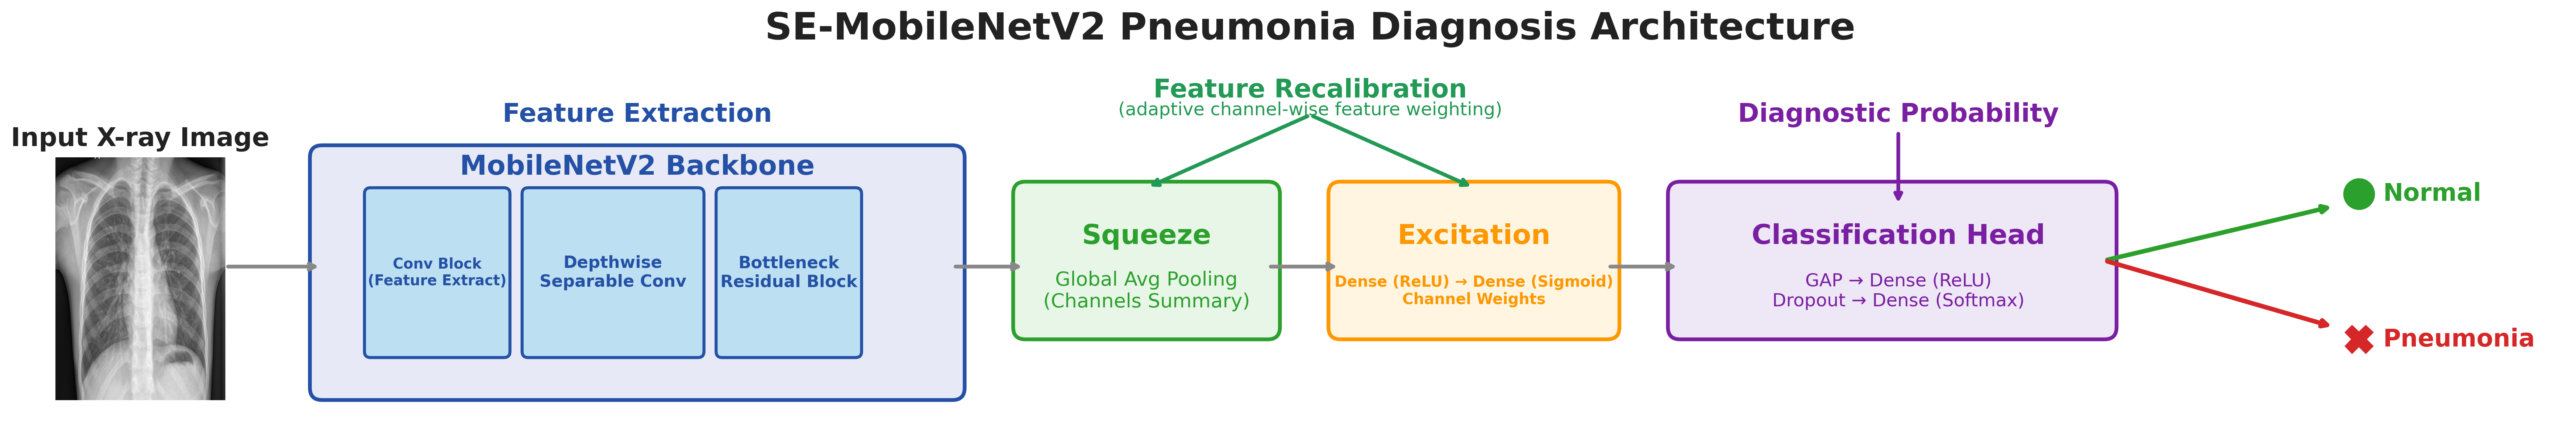

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np

img_path = "/content/drive/MyDrive/chest_xray/test/NORMAL/NORMAL-1110860-0001.jpeg"
img = mpimg.imread(img_path)

fig, ax = plt.subplots(figsize=(24, 6))
ax.axis('off')

# -- Section Headings --
ax.text(2.6, 3.35, "Feature Extraction", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#2451a6')
# Unified heading for SE block with meaning below
ax.text(8.15, 3.55, "Feature Recalibration", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#229954')
ax.text(8.15, 3.42, "(adaptive channel-wise feature weighting)", ha='center', va='bottom', fontsize=12, color='#229954')
ax.text(13.0, 3.35, "Diagnostic Probability", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#7b1fa2')

# -- Two-pointed arrow from Feature Recalibration to Squeeze and Excitation blocks --
ax.annotate('', xy=(6.8, 2.85), xytext=(8.15, 3.45),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#229954'))
ax.annotate('', xy=(9.5, 2.85), xytext=(8.15, 3.45),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#229954'))

# -- Single arrow from "Diagnostic Probability Head" to Classification Head block --
ax.annotate('', xy=(13.0, 2.7), xytext=(13.0, 3.32),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='#7b1fa2'))

# -- Show Input X-ray Image --
ax.imshow(img, extent=[-2.2, -0.8, 1.1, 3.1], zorder=2, cmap = 'gray')
ax.text(-1.5, 3.15, "Input X-ray Image", ha='center', va='bottom', fontsize=17, fontweight='bold', color='#222')

# -- MobileNetV2 Block (bigger, with bigger sub-blocks) --
mob_box = patches.FancyBboxPatch((0, 1.2), 5.2, 1.9, boxstyle="round,pad=0.1", edgecolor='#2451a6', facecolor='#e7eaf6', lw=2.5, zorder=2)
ax.add_patch(mob_box)
ax.text(2.6, 3.02, "MobileNetV2 Backbone", ha='center', va='center', fontsize=18, fontweight='bold', color='#2451a6')

# Sub-blocks inside MobileNetV2 (bigger, spaced)
ax.add_patch(patches.FancyBboxPatch((0.4, 1.5), 1.1, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(0.95, 2.15, "Conv Block\n(Feature Extract)", ha='center', va='center', fontsize=9.5, color='#2451a6', fontweight='bold')
ax.add_patch(patches.FancyBboxPatch((1.7, 1.5), 1.4, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(2.4, 2.15, "Depthwise\nSeparable Conv", ha='center', va='center', fontsize=11, color='#2451a6', fontweight='bold')
ax.add_patch(patches.FancyBboxPatch((3.3, 1.5), 1.1, 1.3, boxstyle="round,pad=0.05", edgecolor='#2451a6', facecolor='#bcdff1', lw=2, zorder=3))
ax.text(3.85, 2.15, "Bottleneck\nResidual Block", ha='center', va='center', fontsize=11, color='#2451a6', fontweight='bold')

# -- Squeeze Block --
sq_box = patches.FancyBboxPatch((5.8, 1.7), 2.0, 1.1, boxstyle="round,pad=0.1", edgecolor='#2ca02c', facecolor='#e7f6e7', lw=2.5, zorder=2)
ax.add_patch(sq_box)
ax.text(6.8, 2.45, "Squeeze", ha='center', va='center', fontsize=18, fontweight='bold', color='#2ca02c')
ax.text(6.8, 2.0, "Global Avg Pooling\n(Channels Summary)", ha='center', va='center', fontsize=13, color='#2ca02c')

# -- Excitation Block --
ex_box = patches.FancyBboxPatch((8.4, 1.7), 2.2, 1.1, boxstyle="round,pad=0.1", edgecolor='#ff9800', facecolor='#fff5e1', lw=2.5, zorder=2)
ax.add_patch(ex_box)
ax.text(9.5, 2.45, "Excitation", ha='center', va='center', fontsize=18, fontweight='bold', color='#ff9800')
ax.text(9.5, 2.0, "Dense (ReLU) → Dense (Sigmoid)\nChannel Weights", ha='center', va='center', fontsize=10, color='#ff9800', fontweight='bold')

# -- Classification Head Block (includes Output Layer) --
clf_box = patches.FancyBboxPatch((11.2, 1.7), 3.5, 1.1, boxstyle="round,pad=0.1", edgecolor='#7b1fa2', facecolor='#ede7f6', lw=2.5, zorder=2)
ax.add_patch(clf_box)
ax.text(13.0, 2.45, "Classification Head", ha='center', va='center', fontsize=18, fontweight='bold', color='#7b1fa2')
ax.text(13.0, 2.0, "GAP → Dense (ReLU)\nDropout → Dense (Softmax)", ha='center', va='center', fontsize=12, color='#7b1fa2')

# -- Output icons and labels (well separated to the right) --
normal_x, normal_y = 16.8, 2.8
pneumonia_x, pneumonia_y = 16.8, 1.6

ax.plot([normal_x], [normal_y], marker="o", color='#2ca02c', markersize=20, lw=0, zorder=4)
ax.text(normal_x + 0.2, normal_y, "Normal", va='center', ha='left', fontsize=16, color='#2ca02c', fontweight='bold')
ax.plot([pneumonia_x], [pneumonia_y], marker="X", color='#d62728', markersize=18, lw=0, zorder=4)
ax.text(pneumonia_x + 0.2, pneumonia_y, "Pneumonia", va='center', ha='left', fontsize=16, color='#d62728', fontweight='bold')

# -- Arrows for flow --
arrowprops = dict(facecolor='#888', edgecolor='#888', arrowstyle='->', lw=2.5)
ax.annotate('', xy=(0, 2.2), xytext=(-0.8, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(5.8, 2.2), xytext=(5.2, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(8.4, 2.2), xytext=(7.8, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(11.2, 2.2), xytext=(10.6, 2.2), arrowprops=arrowprops)

# -- Output arrows (from classification head to output icons, at angles) --
clf_right_x = 14.7
clf_center_y = 2.25
ax.annotate('', xy=(normal_x-0.2, normal_y-0.1), xytext=(clf_right_x, clf_center_y),
            arrowprops=dict(facecolor='#2ca02c', edgecolor='#2ca02c', arrowstyle='->', lw=3))
ax.annotate('', xy=(pneumonia_x-0.2, pneumonia_y+0.1), xytext=(clf_right_x, clf_center_y),
            arrowprops=dict(facecolor='#d62728', edgecolor='#d62728', arrowstyle='->', lw=3))

plt.title("SE-MobileNetV2 Pneumonia Diagnosis Architecture", fontsize=25, fontweight='bold', color='#222', pad=22)
plt.xlim(-2.2, 18.5)
plt.ylim(1, 3.8)
plt.tight_layout()
plt.show()

## **Nuclear Ensemble**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np

# Load the specified X-ray image
img_path = "/content/drive/MyDrive/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg"
img = mpimg.imread(img_path)

# Create the figure with high DPI for better quality
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
fig, ax = plt.subplots(figsize=(32, 12))
ax.axis('off')

# Color scheme
colors = {
    'preprocess': '#3498db',
    'models': ['#e74c3c', '#f39c12', '#27ae60', '#8e44ad', '#e67e22'],
    'collection': '#d35400',
    'optimization': '#9b59b6',
    'meta': '#229954',
    'fusion': '#f39c12',
    'classification': '#c0392b',
    'normal': '#27ae60',
    'pneumonia': '#e74c3c'
}

# -- Section Headings with improved positioning --
ax.text(3, 4.2, "Feature Extraction", ha='center', va='bottom', fontsize=20, fontweight='bold', color='#2c3e50')
ax.text(3, 4.0, "(Individual CNN Models)", ha='center', va='bottom', fontsize=14, fontweight='bold', color='#2c3e50')

# Better positioned subtitles - aligned with their respective boxes
ax.text(10.0, 4.0, "Ensemble Optimization", ha='center', va='bottom', fontsize=20, fontweight='bold', color=colors['optimization'])
ax.text(10.0, 0.4, "Meta-Learning", ha='center', va='bottom', fontsize=20, fontweight='bold', color=colors['meta'])

ax.text(17.2, 4.2, "Final Prediction", ha='center', va='bottom', fontsize=20, fontweight='bold', color=colors['classification'])

# -- Show Input X-ray Image --
ax.imshow(img, extent=[-1.5, 0.5, 1.0, 3.2], zorder=2, cmap='gray')
ax.text(0.5, 3.3, "Input X-ray Image", ha='right', va='bottom', fontsize=14, fontweight='bold', color='#222')

# -- Individual CNN Models --
model_names = ["ResNet50", "DenseNet121", "InceptionV3", "Xception", "MobileNetV2"]
model_y_positions = [3.0, 2.4, 1.8, 1.2, 0.6]

for i, (name, y_pos) in enumerate(zip(model_names, model_y_positions)):
    model_box = patches.FancyBboxPatch((1.5, y_pos), 3.0, 0.5, boxstyle="round,pad=0.05",
                                      edgecolor=colors['models'][i], facecolor='#fff', lw=3, zorder=2)
    ax.add_patch(model_box)
    ax.text(3.0, y_pos + 0.25, name, ha='center', va='center', fontsize=15, fontweight='bold', color=colors['models'][i])

# -- Prediction Collection --
collection_box = patches.FancyBboxPatch((5.2, 1.5), 2.8, 1.5, boxstyle="round,pad=0.1",
                                       edgecolor=colors['collection'], facecolor='#fdf2e9', lw=4, zorder=2)
ax.add_patch(collection_box)
ax.text(6.6, 2.6, "Prediction", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['collection'])
ax.text(6.6, 2.3, "Collection", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['collection'])
ax.text(6.6, 1.9, "Individual outputs", ha='center', va='center', fontsize=13, fontweight='bold', color=colors['collection'])
ax.text(6.6, 1.7, "Softmax probabilities", ha='center', va='center', fontsize=13, fontweight='bold', color=colors['collection'])

# -- Optuna Optimization (positioned better under the title) --
optuna_box = patches.FancyBboxPatch((8.5, 2.5), 3.0, 1.2, boxstyle="round,pad=0.1",
                                   edgecolor=colors['optimization'], facecolor='#f4f1ff', lw=4, zorder=2)
ax.add_patch(optuna_box)
ax.text(10.0, 3.4, "Optuna Optimization", ha='center', va='center', fontsize=16, fontweight='bold', color=colors['optimization'])
ax.text(10.0, 3.0, "100 trials", ha='center', va='center', fontsize=13, fontweight='bold', color=colors['optimization'])
ax.text(10.0, 2.8, "Weight optimization", ha='center', va='center', fontsize=13, fontweight='bold', color=colors['optimization'])
ax.text(10.0, 2.6, "Accuracy maximization", ha='center', va='center', fontsize=13, fontweight='bold', color=colors['optimization'])

# -- Neural Meta-Learner (positioned better under the title) --
meta_box = patches.FancyBboxPatch((8.5, 0.8), 3.0, 1.5, boxstyle="round,pad=0.1",
                                 edgecolor=colors['meta'], facecolor='#e8f8f5', lw=4, zorder=2)
ax.add_patch(meta_box)
ax.text(10.0, 2.0, "Neural Meta-Learner", ha='center', va='center', fontsize=16, fontweight='bold', color=colors['meta'])
ax.text(10.0, 1.7, "GAP → Dense(256, ReLU, l₂=0.01)", ha='center', va='center', fontsize=12, fontweight='bold', color=colors['meta'])
ax.text(10.0, 1.5, "→ Dropout(0.5) → Dense(2, softmax)", ha='center', va='center', fontsize=12, fontweight='bold', color=colors['meta'])

# -- Nuclear Ensemble Fusion --
fusion_box = patches.FancyBboxPatch((12.2, 1.5), 3.0, 1.5, boxstyle="round,pad=0.1",
                                   edgecolor=colors['fusion'], facecolor='#fef9e7', lw=4, zorder=2)
ax.add_patch(fusion_box)
ax.text(13.7, 2.6, "Nuclear Ensemble", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['fusion'])
ax.text(13.7, 2.3, "Fusion", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['fusion'])
ax.text(13.7, 1.9, "60% Meta-learner", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['fusion'])
ax.text(13.7, 1.7, "40% Weighted Ensemble", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['fusion'])

# -- Final Classification --
classification_box = patches.FancyBboxPatch((15.8, 1.5), 2.8, 1.5, boxstyle="round,pad=0.1",
                                           edgecolor=colors['classification'], facecolor='#fdedec', lw=4, zorder=2)
ax.add_patch(classification_box)
ax.text(17.2, 2.6, "Final", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['classification'])
ax.text(17.2, 2.3, "Classification", ha='center', va='center', fontsize=17, fontweight='bold', color=colors['classification'])
ax.text(17.2, 1.9, "Softmax", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['classification'])
ax.text(17.2, 1.7, "Probabilities", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['classification'])

# -- Output icons and labels --
normal_x, normal_y = 20.0, 2.6
pneumonia_x, pneumonia_y = 20.0, 1.8

# Normal output
ax.plot([normal_x], [normal_y], marker="o", color=colors['normal'], markersize=24, lw=0, zorder=4)
ax.text(normal_x + 0.3, normal_y, "Normal", va='center', ha='left', fontsize=18, color=colors['normal'], fontweight='bold')

# Pneumonia output
ax.plot([pneumonia_x], [pneumonia_y], marker="X", color=colors['pneumonia'], markersize=22, lw=0, zorder=4)
ax.text(pneumonia_x + 0.3, pneumonia_y, "Pneumonia", va='center', ha='left', fontsize=18, color=colors['pneumonia'], fontweight='bold')

# -- Flow Arrows with enhanced visibility --
arrowprops = dict(facecolor='#555', edgecolor='#555', arrowstyle='->', lw=4)

# Main flow arrows
ax.annotate('', xy=(1.5, 2.2), xytext=(0.5, 2.2), arrowprops=arrowprops)
ax.annotate('', xy=(5.2, 2.2), xytext=(4.5, 2.2), arrowprops=arrowprops)

# From collection to optimization and meta-learner
ax.annotate('', xy=(8.5, 3.1), xytext=(8.0, 2.5),
            arrowprops=dict(arrowstyle='->', lw=4, color=colors['optimization']))
ax.annotate('', xy=(8.5, 1.8), xytext=(8.0, 2.0),
            arrowprops=dict(arrowstyle='->', lw=4, color=colors['meta']))

# From optimization and meta-learner to fusion
ax.annotate('', xy=(12.2, 2.4), xytext=(11.5, 3.0),
            arrowprops=dict(arrowstyle='->', lw=4, color=colors['fusion']))
ax.annotate('', xy=(12.2, 2.0), xytext=(11.5, 1.6),
            arrowprops=dict(arrowstyle='->', lw=4, color=colors['fusion']))

# From fusion to classification
ax.annotate('', xy=(15.8, 2.2), xytext=(15.2, 2.2), arrowprops=arrowprops)

# From classification to outputs
ax.annotate('', xy=(19.7, 2.6), xytext=(18.6, 2.4),
            arrowprops=dict(arrowstyle='->', lw=3, color=colors['normal']))
ax.annotate('', xy=(19.7, 1.8), xytext=(18.6, 2.0),
            arrowprops=dict(arrowstyle='->', lw=3, color=colors['pneumonia']))

# Set axis limits for better framing
ax.set_xlim(-2.5, 23)
ax.set_ylim(-2, 5.5)

# Add a subtle border around the entire diagram
border = patches.Rectangle((-1.8, 0.2), 24.5, 4.8, linewidth=3, edgecolor='#34495e',
                          facecolor='none', linestyle='--', alpha=0.3)
ax.add_patch(border)

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

## **EfficientNet-B4 Architecture**

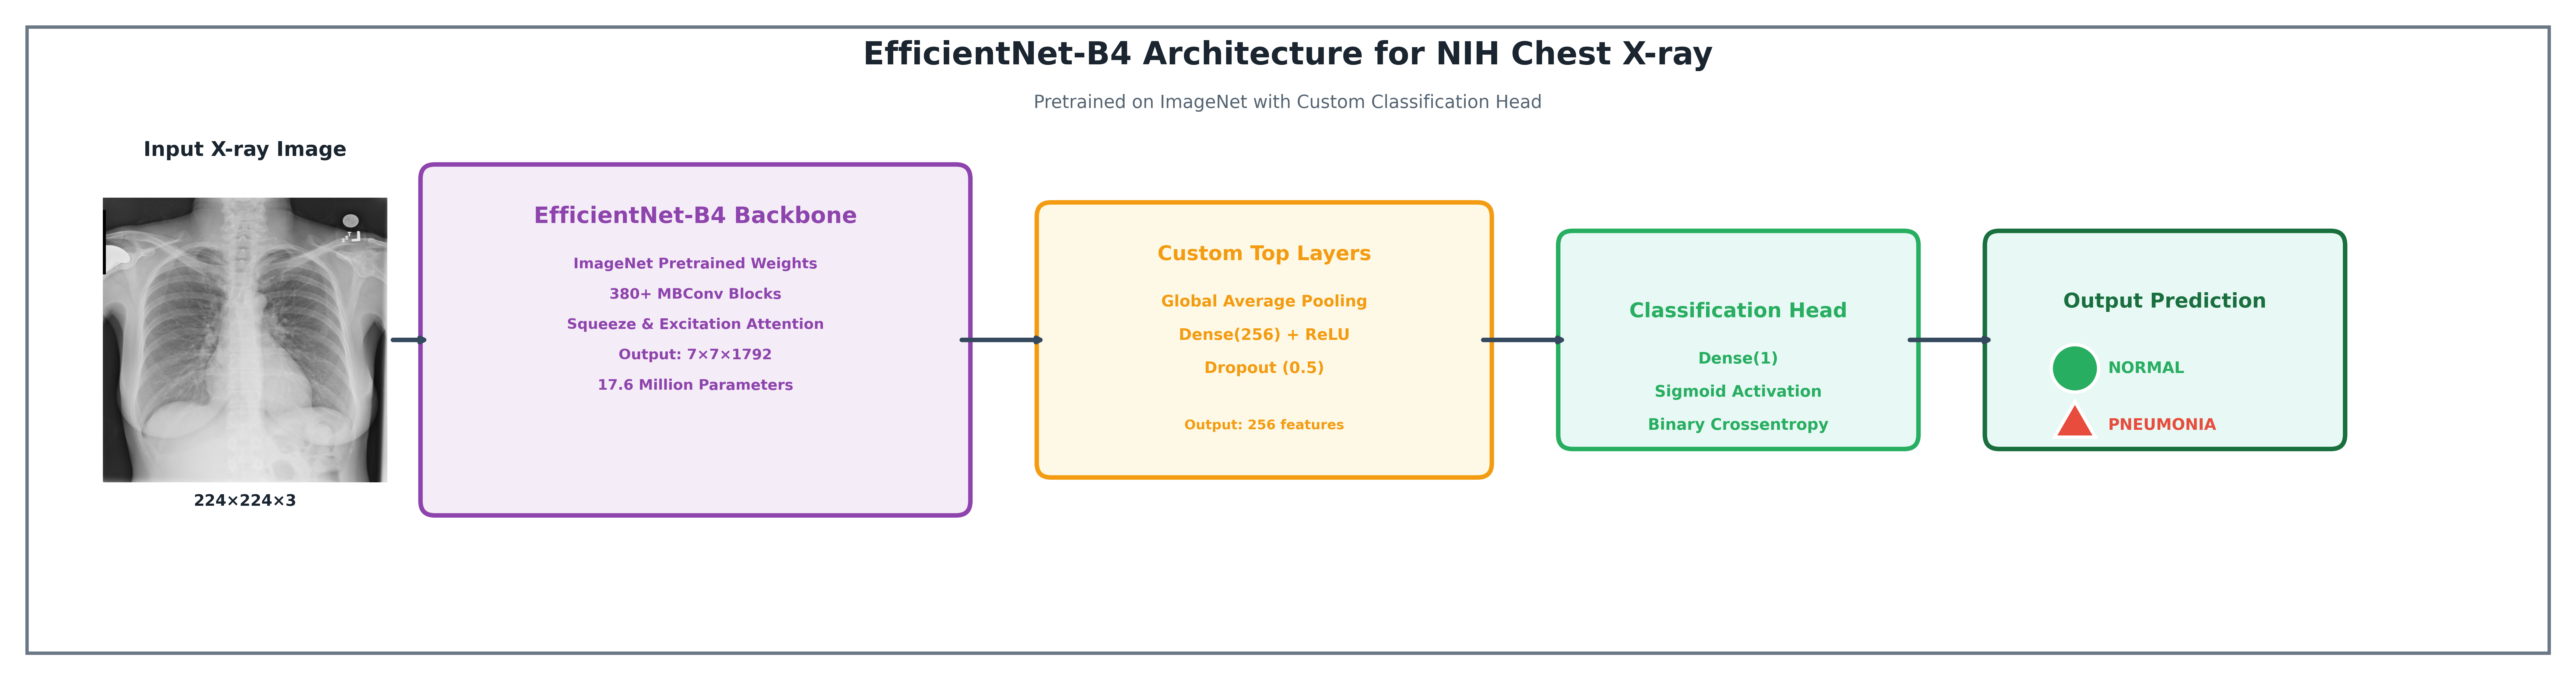

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np

# Load a sample NIH X-ray image
img_path = "/content/drive/MyDrive/NIH_processed/test/normal/00000115_000.png"  # Update with actual path
img = mpimg.imread(img_path)

# Create the figure with high DPI
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
fig, ax = plt.subplots(figsize=(32, 12))
ax.axis('off')

# Enhanced color scheme
colors = {
    'input': '#1A252F',
    'preprocess': '#2980B9',
    'base_model': '#8E44AD',  # New color for base model
    'custom_top': '#F39C12',
    'classification': '#27AE60',
    'output': '#196F3D',
    'normal': '#27AE60',
    'pneumonia': '#E74C3C'
}

# Title
ax.text(13.5, 10.5, "EfficientNet-B4 Architecture for NIH Chest X-ray", ha='center', va='center',
        fontsize=28, fontweight='bold', color='#1A252F')
ax.text(13.5, 10.0, "Pretrained on ImageNet with Custom Classification Head", ha='center', va='center',
        fontsize=16, color='#566573')

# -- Input X-ray Image --
ax.imshow(img, extent=[1, 4, 6, 9], zorder=2, cmap='gray')
ax.text(2.5, 9.5, "Input X-ray Image", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['input'])
ax.text(2.5, 5.8, "224×224×3", ha='center', va='center', fontsize=14, fontweight='bold', color=colors['input'])

# -- EfficientNet-B4 Base Model (shifted left) --
base_box = patches.FancyBboxPatch((4.5, 5.8), 5.5, 3.4, boxstyle="round,pad=0.15",
                                 edgecolor=colors['base_model'], facecolor='#F4ECF7', lw=4)
ax.add_patch(base_box)
ax.text(7.25, 8.8, "EfficientNet-B4 Backbone", ha='center', va='center', fontsize=20, fontweight='bold', color=colors['base_model'])
base_details = [
    "ImageNet Pretrained Weights",
    "380+ MBConv Blocks",
    "Squeeze & Excitation Attention",
    "Output: 7×7×1792",
    "17.6 Million Parameters"
]
for i, detail in enumerate(base_details):
    ax.text(7.25, 8.3 - i*0.32, detail, ha='center', va='center', fontsize=13, fontweight='bold', color=colors['base_model'])

# -- Custom Top Layers (shifted left) --
custom_box = patches.FancyBboxPatch((11, 6.2), 4.5, 2.6, boxstyle="round,pad=0.15",
                                   edgecolor=colors['custom_top'], facecolor='#FEF9E7', lw=4)
ax.add_patch(custom_box)
ax.text(13.25, 8.4, "Custom Top Layers", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['custom_top'])
custom_details = [
    "Global Average Pooling",
    "Dense(256) + ReLU",
    "Dropout (0.5)"
]
for i, detail in enumerate(custom_details):
    ax.text(13.25, 7.9 - i*0.35, detail, ha='center', va='center', fontsize=14, fontweight='bold', color=colors['custom_top'])
ax.text(13.25, 6.6, "Output: 256 features", ha='center', va='center', fontsize=12, fontweight='bold', color=colors['custom_top'])

# -- Classification Head (shifted left) --
class_box = patches.FancyBboxPatch((16.5, 6.5), 3.5, 2, boxstyle="round,pad=0.15",
                                  edgecolor=colors['classification'], facecolor='#E8F8F5', lw=4)
ax.add_patch(class_box)
ax.text(18.25, 7.8, "Classification Head", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['classification'])
class_details = [
    "Dense(1)",
    "Sigmoid Activation",
    "Binary Crossentropy"
]
for i, detail in enumerate(class_details):
    ax.text(18.25, 7.3 - i*0.35, detail, ha='center', va='center', fontsize=14, fontweight='bold', color=colors['classification'])

# -- Final Output (shifted left) --
output_box = patches.FancyBboxPatch((21, 6.5), 3.5, 2, boxstyle="round,pad=0.15",
                                   edgecolor=colors['output'], facecolor='#E8F8F5', lw=4)
ax.add_patch(output_box)
ax.text(22.75, 7.9, "Output Prediction", ha='center', va='center', fontsize=18, fontweight='bold', color=colors['output'])

# Class symbols
normal_y = 7.2
normal_circle = patches.Circle((21.8, normal_y), 0.25, facecolor=colors['normal'], edgecolor='white', lw=3)
ax.add_patch(normal_circle)
ax.text(22.15, normal_y, "NORMAL", va='center', ha='left', fontsize=14, fontweight='bold', color=colors['normal'])

pneumonia_y = 6.6
pneumonia_triangle = patches.RegularPolygon((21.8, pneumonia_y), 3, radius=0.25,
                                           facecolor=colors['pneumonia'], edgecolor='white', lw=3)
ax.add_patch(pneumonia_triangle)
ax.text(22.15, pneumonia_y, "PNEUMONIA", va='center', ha='left', fontsize=14, fontweight='bold', color=colors['pneumonia'])

# -- Flow Arrows (adjusted for new positions) --
arrow_style = dict(arrowstyle='->', lw=4, color='#34495E', shrinkA=5, shrinkB=5)

# Main flow arrows
ax.annotate('', xy=(4.5, 7.5), xytext=(4, 7.5), arrowprops=arrow_style)  # Input to Base Model
ax.annotate('', xy=(11, 7.5), xytext=(10, 7.5), arrowprops=arrow_style)  # Base Model to Custom Top
ax.annotate('', xy=(16.5, 7.5), xytext=(15.5, 7.5), arrowprops=arrow_style)  # Custom Top to Classification
ax.annotate('', xy=(21, 7.5), xytext=(20, 7.5), arrowprops=arrow_style)  # Classification to Output

# Set axis limits (adjusted for shifted elements)
ax.set_xlim(0, 27)
ax.set_ylim(4, 11)

# Add border (adjusted for new dimensions)
border = patches.Rectangle((0.2, 4.2), 26.6, 6.6, linewidth=3, edgecolor='#2C3E50',
                          facecolor='none', linestyle='-', alpha=0.7)
ax.add_patch(border)

plt.tight_layout()
plt.savefig('efficientnet_b4_nih_design.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()